<a href="https://colab.research.google.com/github/Jushef/Stock-Market-Analysis/blob/main/Portafolio_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Portafoliio de inversiones

In [ ]:
%matplotlib inline
import stock_analysis
from stock_analysis.utils import group_stocks

start, end = '2021-04-30', '2022-04-29'
reader = stock_analysis.StockReader(start, end)

# get bitcoin data
bitcoin = reader.get_bitcoin_data('USD')

# get faang data
nvda, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in ['NVDA', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data('S&P 500')

faang = group_stocks(
    {
        'NVIDIA': nvda, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

### Utilizando las clases `StockAnalyzer` y `StockVisualizer`, calcula y traza tres niveles de soporte y resistencia para el precio de cierre de Netflix.

Text(0, 0.5, 'precio ($)')

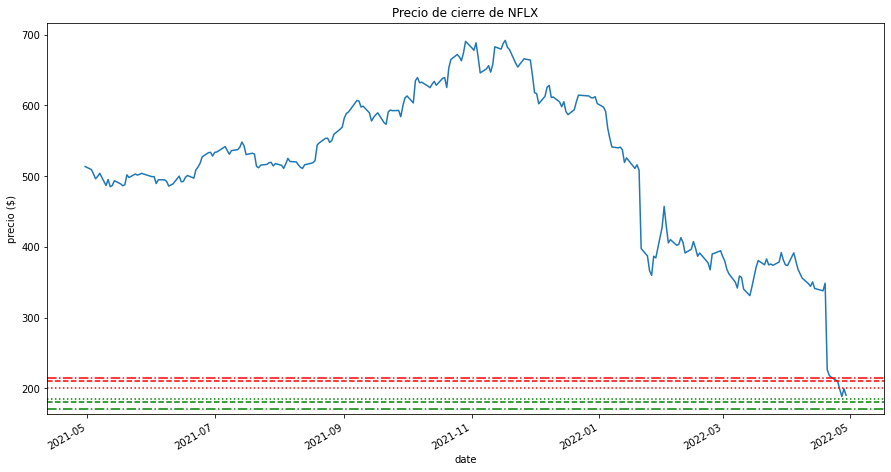

In [ ]:
import itertools

def levels(analyzer, method):
    return [getattr(analyzer, method)(i) for i in range(1, 4)]

# calculate support/resistance levels
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
support_levels, resistance_levels = (
    levels(nflx_analyzer, metric) for metric in ['support', 'resistance']
)

nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='Precio de cierre de NFLX')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'nivel de apoyo {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'nivel de resistencial {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('precio ($)')

### Con la clase `StockVisualizer`, observe el efecto de la negociación fuera de horario en las acciones FAANG.
1. *Como acciones individuales*
2. *Como una cartera utilizando la suma de sus precios de cierre y apertura*

#### Parte 1

array([[<AxesSubplot:title={'center':"Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"NVIDIA Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'NVIDIA after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Netflix Open Price - Prior Day's Close"}, xlabel='date',

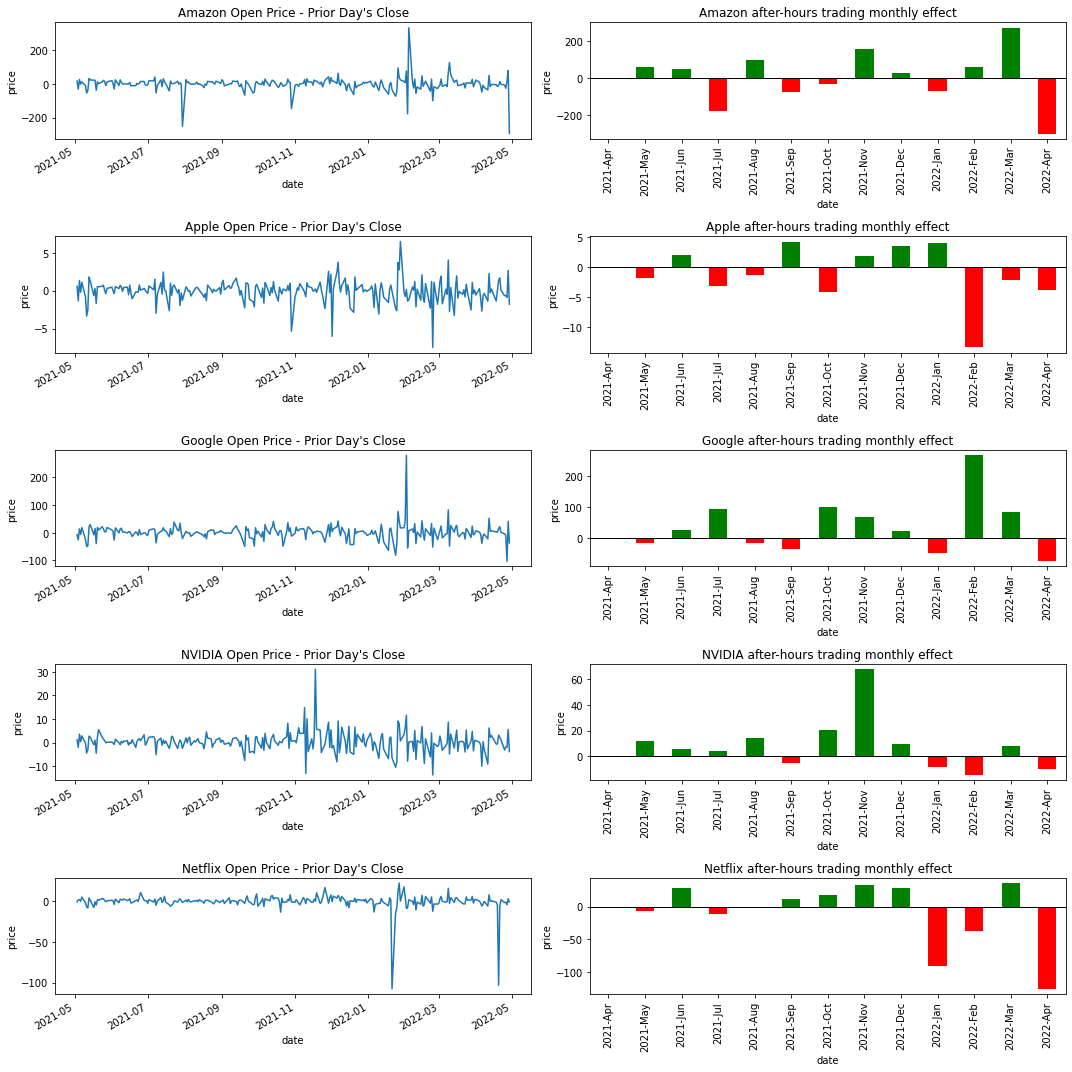

In [ ]:
stock_analysis.AssetGroupVisualizer(faang).after_hours_trades()

#### Parte 2

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

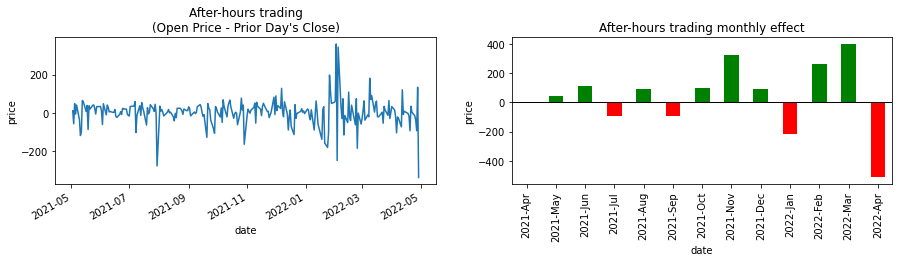

In [ ]:
from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()

### Cartera FAANG
Utilizando el método `StockVisualizer.open_to_close()`, cree un gráfico que rellene el área entre el precio de apertura de la cartera FAANG y su precio de cierre cada día en rojo si el precio disminuyó y en verde si el precio aumentó.

Text(0.5, 1.0, 'Variación diaria de precios (de apertura al cierre)')

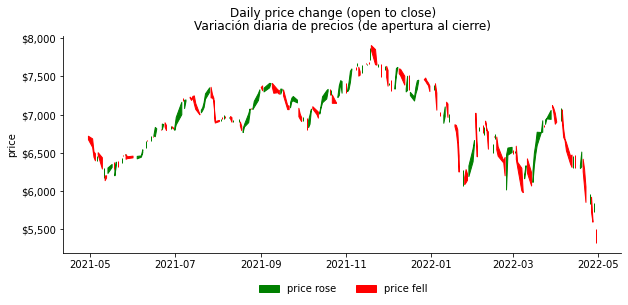

In [ ]:
from matplotlib.ticker import StrMethodFormatter
from stock_analysis.utils import make_portfolio

ax = stock_analysis.StockVisualizer(make_portfolio(faang)).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Variación diaria de precios (de apertura al cierre)')

### Cartera de S&P 500 y Bitcoin
Obsérvese que después de reindexar los datos del S&P 500, podemos simplemente sumarlos con los datos del bitcoin para obtener el valor de la cartera:

Text(0.5, 1.0, 'Variación diaria de precios (de apertura al cierre)')

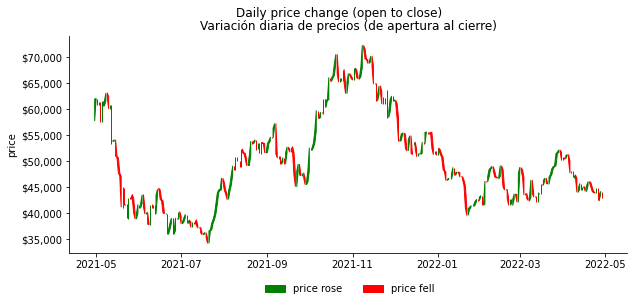

In [ ]:
import pandas as pd
import numpy as np

def reindex_stock_data(df):
    """Gestiona la reindexación de los datos de las existencias"""
    result = df.copy().reindex(
        pd.date_range(start, end=end, freq='D')
    ).assign(
        volume=lambda x: x.fillna(0),
        close=lambda x: x.fillna(method='ffill'),
        open=lambda x: x.open.combine_first(x.close),
        high=lambda x: x.high.combine_first(x.close),
        low=lambda x: x.low.combine_first(x.close)
    )
    result.index.rename('date', inplace=True)
    return result

sp_reindexed = reindex_stock_data(sp)

ax = stock_analysis.StockVisualizer(bitcoin + sp_reindexed).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Variación diaria de precios (de apertura al cierre)')

### Compare un fondo de inversión o ETF (Exchange Traded Fund) de su elección con sus activos, utilizando la volatilidad anualizada y la clase `AssetGroupAnalyzer`. Estos fondos están construidos para mitigar el riesgo, por lo que la volatilidad del fondo será menor que la de los activos que lo componen.

*Nota: Se utiliza el fondo de inversión FBALX, cuya composición puede encontrarse en https://fundresearch.fidelity.com/mutual-funds/composition/316345206. Composición utilizada para la solución tomada el 1 de Mayo del 2022.*

In [ ]:
fbalx = reader.get_ticker_data('FBALX')
msft = reader.get_ticker_data('MSFT')
mutual_fund = group_stocks({
    '0 - FBALX': fbalx,
    '1 - Microsoft': msft,
    '2 - Apple': aapl,
    '3 - Amazon': amzn,
    '4 - Netflix': nflx
})
stock_analysis.AssetGroupAnalyzer(mutual_fund).analyze('annualized_volatility')

{'0 - FBALX': 0.1483825544477532,
 '1 - Microsoft': 0.2550576033055648,
 '2 - Apple': 0.25412243576442944,
 '3 - Amazon': 0.3588389962278998,
 '4 - Netflix': 0.5437437933406655}

### Escribamos una función que devuelva un dataframe de una fila con las columnas `alpha`, `beta`, `sharpe_ratio`, `annualized_volatility`, `is_bear_market`, y `is_bull_market` que contengan cada uno los resultados de ejecutar los respectivos métodos en una acción determinada utilizando la clase `StockAnalyzer`.
En este caso, utilizamos el bono del Tesoro de EE.UU. a 10 años para la tasa de rendimiento libre de riesgo. Puedes buscar los tipos [aquí](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield) o utilizar el método `StockReader.get_risk_free_rate_of_return()`.

In [ ]:
import pandas as pd

def metric_table(stock, index, r_f):
    """
    Hacer una tabla de métricas para una acción.

    Parámetros:
        - Acción: El marco de datos de la acción.
        - índice: El dataframe del índice.
        - r_f: La tasa de rendimiento libre de riesgo.
     
    Rendimiento:
        Un objeto `pandas.DataFrame` con una sola fila de métricas.
    """
    return pd.DataFrame({
        metric: getattr(
            stock_analysis.StockAnalyzer(stock), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            'alpha': {'index': index, 'r_f': r_f}, 
            'beta': {'index': index}, 
            'sharpe_ratio': {'r_f': r_f},
            'annualized_volatility': {},
            'is_bear_market': {},
            'is_bull_market': {}
        }.items()
    }, index=range(1))

# test out the function
metric_table(fbalx, sp, r_f=reader.get_risk_free_rate_of_return())

,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,-0.12801,0.767821,-43.17005,0.148383,False,False


### Con la clase `StockModeler`, construyamos un modelo ARIMA ajustado a los datos del S&P 500 desde el 30 de abril de 2021 hasta el 01 de enero de 2022 y utilícelo para predecir el rendimiento en febrero de 2022. Asegúrese de examinar los residuos y comparar el rendimiento predicho con el rendimiento real.

Primero, aísle los datos para entrenar el modelo y probarlo:

In [ ]:
train, test = sp['2021':'2022-01'], sp.loc['2022-02']

Mira el gráfico de autocorrelación:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

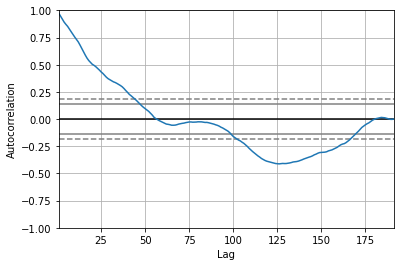

In [ ]:
# we can use autocorrelation plots to find a good starting point for ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.close)

Un ejemplo de modelo ARIMA que se ajusta en un tiempo razonable:

In [ ]:
%%capture
from stock_analysis import StockModeler
arima_model = StockModeler.arima(train, ar=15, i=1, ma=5)

Examine los residuos:

array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

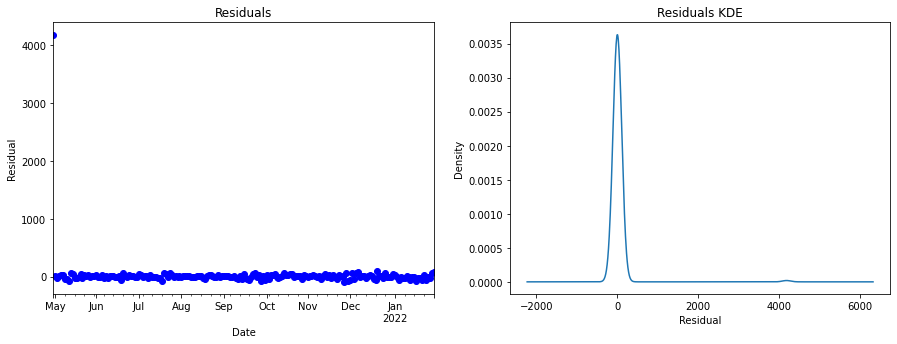

In [ ]:
StockModeler.plot_residuals(arima_model)

Compare las predicciones del modelo ARIMA con lo que realmente ocurrió:

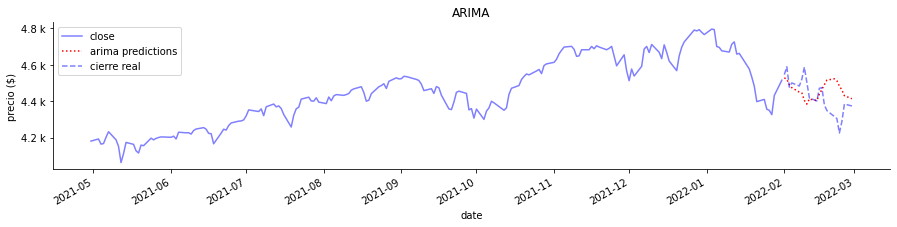

In [ ]:
from matplotlib.ticker import EngFormatter

dates = test.index

arima_ax = StockModeler.arima_predictions(
    train, arima_model, start=dates[0], end=dates[-1],
    title='ARIMA', color='b', figsize=(15, 3), alpha=0.5
)
test.close.plot(ax=arima_ax, style='b--', label='cierre real', alpha=0.5)
arima_ax.legend()
arima_ax.set_ylabel('precio ($)')
arima_ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    arima_ax.spines[spine].set_visible(False)

### Creemos una clave API para AlphaVantage [aquí](https://www.alphavantage.co/support/#api-key) y recoja el tipo de cambio diario de USD a JPY utilizando el método `StockReader.get_forex_rates()`. 
Asegúrese de utilizar el mismo objeto `StockReader` que creó para recoger los datos de las acciones. Construya un gráfico de velas con los datos de Abril del 2021 a Abril del 2022, remuestreados a intervalos de una semana. Sugerencia: eche un vistazo a [la función `slice()`](https://docs.python.org/3/library/functions.html#slice) para proporcionar el rango de fechas.

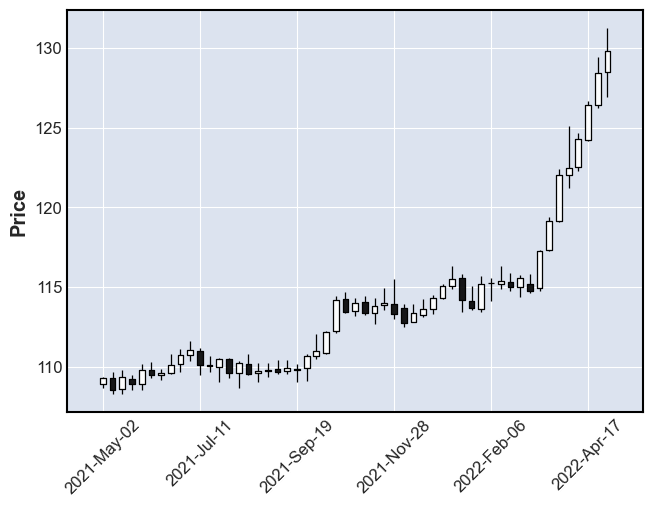

In [ ]:
forex = reader.get_forex_rates('USD', 'JPY', api_key='RIVGMQFML6MO1GMP')
stock_analysis.StockVisualizer(forex).candlestick(date_range=slice('2021-04-01', '2022-04-29'), resample='1W')